### CONTENTS
#### 1 Importing Libraries
#### 2 Importing Data 
#### 3 Fitting Visual Weather Systems CNN

## 1 Importing Libraries

In [3]:
import os
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.layers import (
    Conv1D, Conv2D, Dense, BatchNormalization, Flatten, 
    MaxPooling2D, Activation, Dropout
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## 2 Importing Data

In [6]:
# Base path
path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning\Multi-class Weather Dataset'

# List subfolders inside the dataset folder
folders = os.listdir(path)
print("Subfolders in dataset:", folders)


Subfolders in dataset: ['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [8]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 3 Fitting Visual Weather Systems CNN

In [11]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [13]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 30, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

C:\Users\elena\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4816 - loss: 0.1493 - val_accuracy: 0.7902 - val_loss: 0.0815
Epoch 2/30
 1/28 ━━━━━━━━━━━━━━━━━━━━ 17s 655ms/step - accuracy: 0.7812 - loss: 0.0774

C:\Users\elena\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7812 - loss: 0.0774 - val_accuracy: 0.8170 - val_loss: 0.0774
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 747ms/step - accuracy: 0.7281 - loss: 0.0907 - val_accuracy: 0.8036 - val_loss: 0.0849
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9688 - loss: 0.0345 - val_accuracy: 0.7455 - val_loss: 0.1002
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 759ms/step - accuracy: 0.8311 - loss: 0.0655 - val_accuracy: 0.8036 - val_loss: 0.0668
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9375 - loss: 0.0440 - val_accuracy: 0.8527 - val_loss: 0.0627
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 747ms/step - accuracy: 0.7906 - loss: 0.0786 - val_accuracy: 0.7679 - val_loss: 0.1012
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9062 - loss: 0.0400 - val_accuracy: 0.7812 - val_loss: 0.0944
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 750ms/step - accuracy: 0.8634 - loss: 0.0587 - val_accuracy: 0.7098 - val

In [15]:
results = pd.DataFrame(model.history.history)

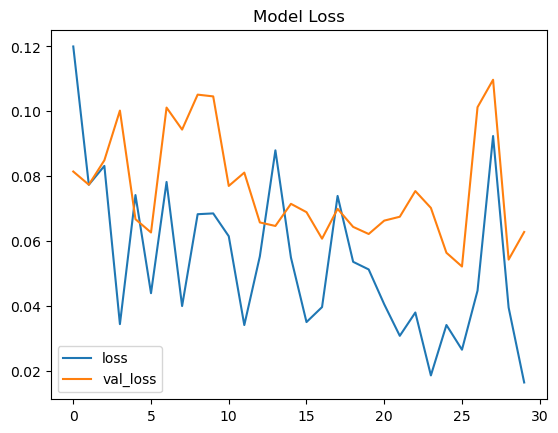

In [17]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

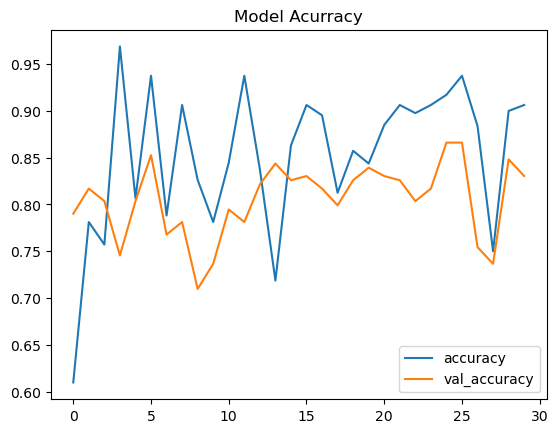

In [19]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [21]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.90625, Val_Accuracy: 0.8303571343421936
Loss: 0.01650201715528965, Val_Loss: 0.06284918636083603


In [25]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step


In [27]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


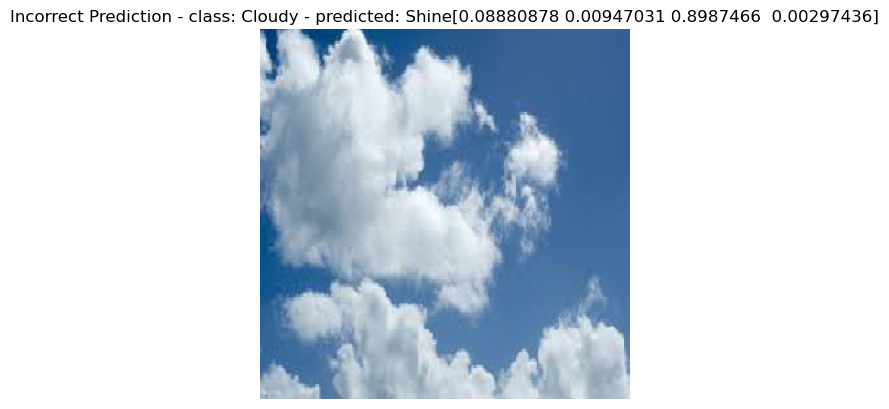

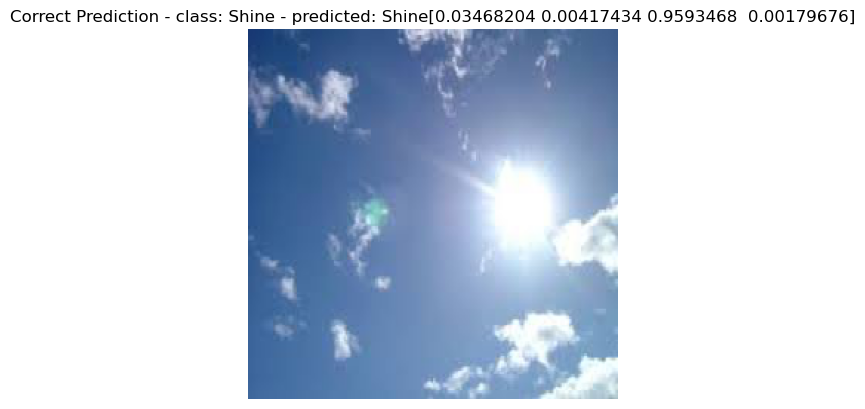

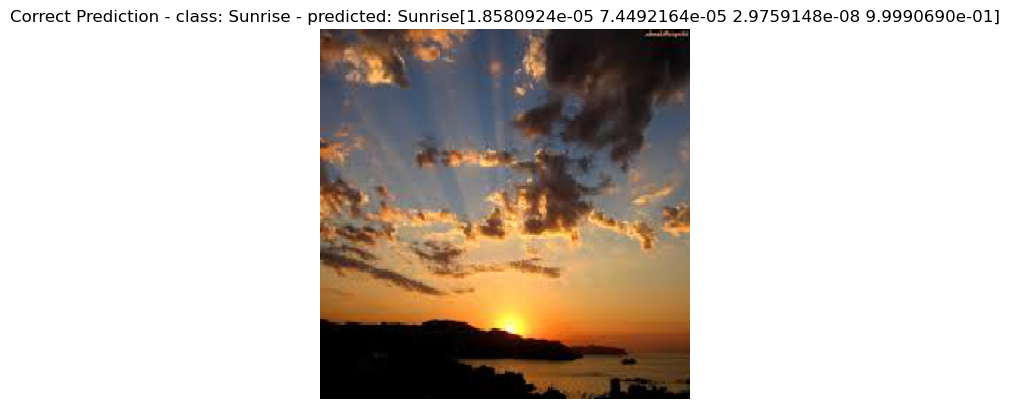

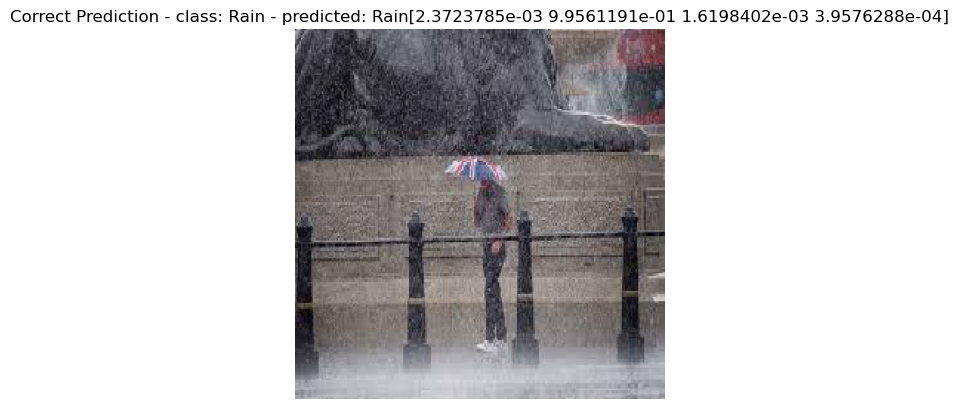

In [31]:
predict_one(model, 5) 